In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import community

In [ ]:
# 1 & 2. Read Files with robust encoding check
def load_data_robust(file_path):
    encodings = ['utf-8', 'utf-16', 'latin1', 'utf-8-sig']
    for enc in encodings:
        try:
            df = pd.read_csv(file_path, encoding=enc)
            return df
        except Exception:
            continue
    raise ValueError(f"Could not load {file_path}")

In [ ]:
teams_df = load_data_robust('mlb_teams.csv')
games_df = load_data_robust('mlb_games.csv')

In [ ]:
# Prepare Nodes and Edges
nodes = teams_df['prefix_1'].unique()
edge_data = games_df[['away_team', 'home_team']].dropna()

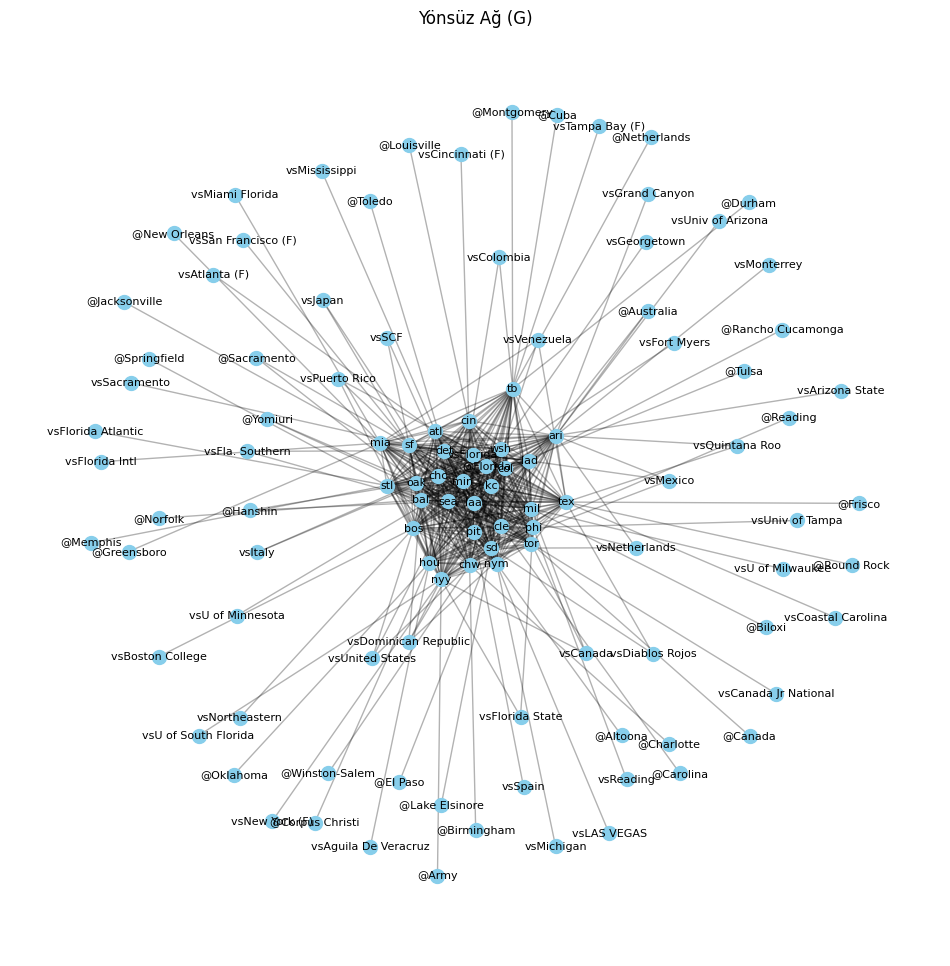

In [ ]:
# 3. Create Undirected Graph (G) - removing duplicates
undirected_edges = set()
for u, v in edge_data.values:
    if u > v:
        undirected_edges.add((v, u))
    else:
        undirected_edges.add((u, v))

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(list(undirected_edges))

# 4. Draw G
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42, k=0.15)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='skyblue')
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("Yönsüz Ağ (G)")
plt.axis('off')
plt.savefig("G_network_final.png")

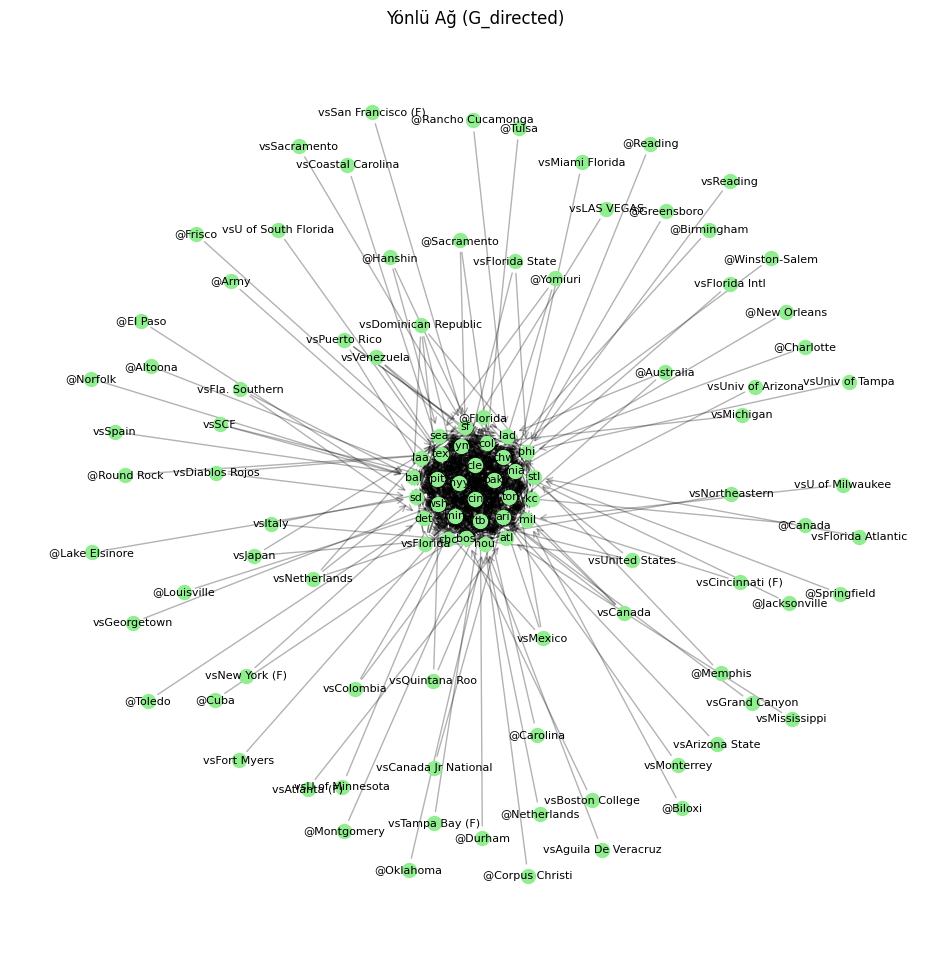

In [ ]:
# 5. Create and Draw Directed Graph (G_directed)
directed_edges = set()
for u, v in edge_data.values:
    directed_edges.add((u, v))

G_directed = nx.DiGraph()
G_directed.add_nodes_from(nodes)
G_directed.add_edges_from(list(directed_edges))

plt.figure(figsize=(12, 12))
pos_d = nx.spring_layout(G_directed, seed=42, k=0.15)
nx.draw_networkx_nodes(G_directed, pos_d, node_size=100, node_color='lightgreen')
nx.draw_networkx_edges(G_directed, pos_d, alpha=0.3, arrowstyle='->', arrowsize=10)
nx.draw_networkx_labels(G_directed, pos_d, font_size=8)
plt.title("Yönlü Ağ (G_directed)")
plt.axis('off')
plt.savefig("G_directed_network_final.png")

In [ ]:
# 6. List Degrees
degrees = dict(G.degree())

In [ ]:
# 7. Average Degree
avg_degree = sum(degrees.values()) / len(G)

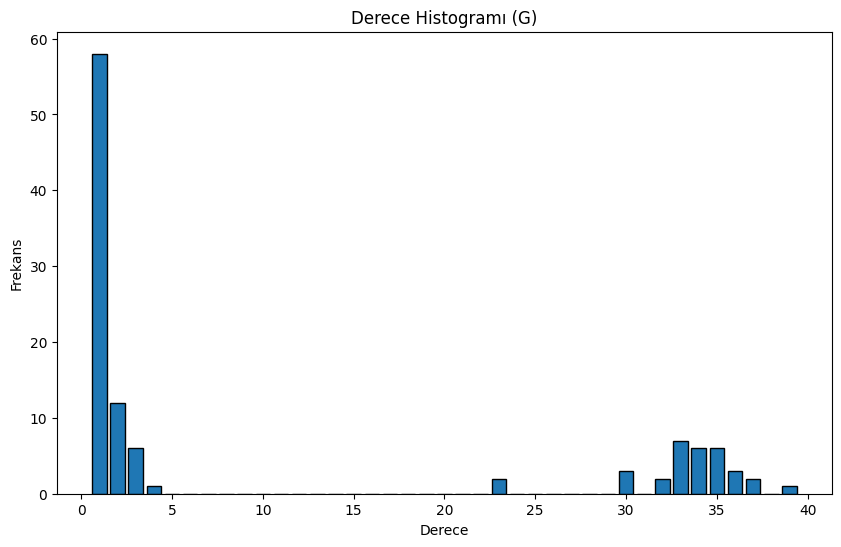

In [ ]:
# 8. Degree Histogram
degree_seq = list(degrees.values())
plt.figure(figsize=(10, 6))
plt.hist(degree_seq, bins=range(min(degree_seq), max(degree_seq) + 2), edgecolor='black', align='left', rwidth=0.8)
plt.title("Derece Histogramı (G)")
plt.xlabel("Derece")
plt.ylabel("Frekans")
plt.savefig("G_degree_histogram_final.png")

In [ ]:
# 9-14. Centralities
deg_cent = nx.degree_centrality(G)
close_cent = nx.closeness_centrality(G)
bet_cent = nx.betweenness_centrality(G)

try:
    eigen_cent = nx.eigenvector_centrality(G, max_iter=1000)
except:
    eigen_cent = {n: 0 for n in G.nodes()}

try:
    katz_cent = nx.katz_centrality(G, max_iter=1000, alpha=0.01)
except:
    katz_cent = {n: 0 for n in G.nodes()}

pagerank = nx.pagerank(G)

In [ ]:
# 15. Modularity
communities = list(community.greedy_modularity_communities(G))
modularity_score = community.modularity(G, communities)

In [ ]:
# 16. Density
density = nx.density(G)

In [ ]:
# 17. Average Clustering
avg_clustering = nx.average_clustering(G)

In [ ]:
# 18. Diameter
if nx.is_connected(G):
    diameter = nx.diameter(G)
else:
    largest_cc = max(nx.connected_components(G), key=len)
    G_sub = G.subgraph(largest_cc)
    diameter = nx.diameter(G_sub)

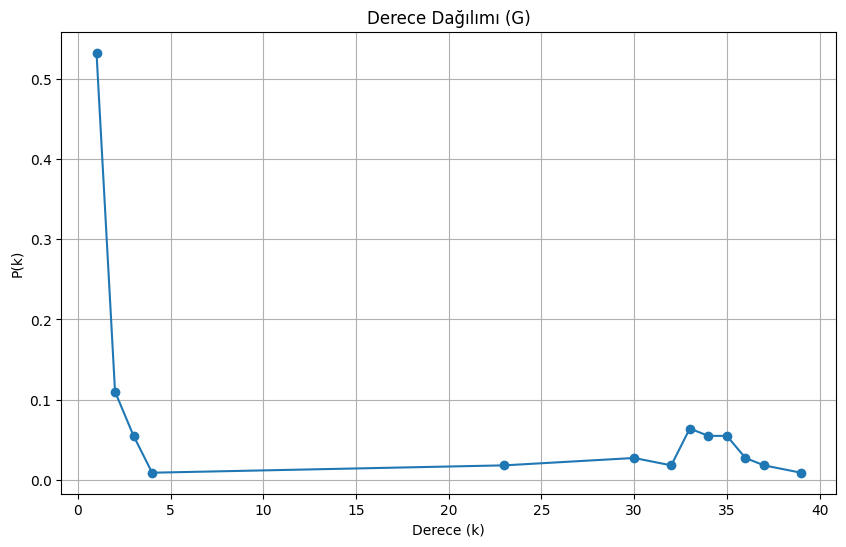

In [ ]:
# 19. Degree Distribution
degree_counts = {}
for d in degree_seq:
    degree_counts[d] = degree_counts.get(d, 0) + 1
prob_dist = {k: v / len(G) for k, v in degree_counts.items()}
sorted_k = sorted(prob_dist.keys())
sorted_p = [prob_dist[k] for k in sorted_k]

plt.figure(figsize=(10, 6))
plt.plot(sorted_k, sorted_p, 'o-')
plt.title("Derece Dağılımı (G)")
plt.xlabel("Derece (k)")
plt.ylabel("P(k)")
plt.grid(True)
plt.savefig("G_degree_distribution_final.png")


In [ ]:
# Prepare summary for output
summary_metrics = {
    "nodes_count": len(G.nodes()),
    "edges_count": len(G.edges()),
    "avg_degree": avg_degree,
    "modularity": modularity_score,
    "density": density,
    "avg_clustering": avg_clustering,
    "diameter": diameter
}

In [ ]:
# Top 5 for centralities
def get_top5(metric_dict):
    return sorted(metric_dict.items(), key=lambda x: x[1], reverse=True)[:5]

top5_metrics = {
    "Degree": get_top5(degrees),
    "Betweenness": get_top5(bet_cent),
    "Closeness": get_top5(close_cent),
    "Eigenvector": get_top5(eigen_cent),
    "PageRank": get_top5(pagerank)
}

print("Summary:", summary_metrics)
print("Top 5s:", top5_metrics)

Summary: {'nodes_count': 109, 'edges_count': 585, 'avg_degree': 10.73394495412844, 'modularity': 0.12759149682226606, 'density': 0.09938837920489296, 'avg_clustering': 0.41145226913781136, 'diameter': 3}
Top 5s: {'Degree': [('ari', 39), ('tb', 37), ('tex', 37), ('phi', 36), ('sd', 36)], 'Betweenness': [('ari', 0.1016343494672087), ('tb', 0.09964404140213431), ('mia', 0.09622706818968502), ('tex', 0.07809679321937225), ('nyy', 0.0730500749971155)], 'Closeness': [('ari', 0.6101694915254238), ('tb', 0.6033519553072626), ('tex', 0.6033519553072626), ('phi', 0.6), ('sd', 0.6)], 'Eigenvector': [('ari', 0.18213138223427158), ('sd', 0.1813656161139878), ('tex', 0.1813505965563121), ('sf', 0.1811706990043013), ('bal', 0.18116748658406545)], 'PageRank': [('ari', 0.033002248872938685), ('tb', 0.03171901212780676), ('mia', 0.030315397566141572), ('tex', 0.030227364783455588), ('phi', 0.02892582222888935)]}
